In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Loading dataset
%load_ext sql
%config SqlMagic.autocommit = False

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [10]:
%sql sqlite:///./data/diamonds_train.db

In [11]:
%%sql tables <<
SELECT
    name
FROM
    sqlite_master
WHERE
    type ='table' AND
    name NOT LIKE 'sqlite_%';

 * sqlite:///./data/diamonds_train.db
Done.
Returning data to local variable tables


In [12]:
%%sql arranged_dataframe <<

SELECT diamonds_properties.index_id, cut, color, clarity, depth, carat, diamonds_dimensions.'table', x, y, z, price, city  FROM diamonds_properties
INNER JOIN diamonds_cut
ON diamonds_cut.cut_id = diamonds_properties.cut_id
INNER JOIN diamonds_color
ON diamonds_color.color_id = diamonds_properties.color_id
INNER JOIN diamonds_clarity
ON diamonds_clarity.clarity_id = diamonds_properties.clarity_id
INNER JOIN diamonds_dimensions
ON diamonds_dimensions.index_id = diamonds_properties.index_id
INNER JOIN diamonds_transactional
ON diamonds_transactional.index_id = diamonds_properties.index_id
INNER JOIN diamonds_city
ON diamonds_city.city_id = diamonds_transactional.city_id

 * sqlite:///./data/diamonds_train.db
Done.
Returning data to local variable arranged_dataframe


In [13]:
#I won't be using the city column
diamonds = pd.DataFrame(arranged_dataframe)
diamonds = diamonds.drop("index_id", axis=1)
diamonds = diamonds.drop("city", axis=1)

In [14]:
diamonds.describe()

,depth,carat,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,0.797706,57.446133,5.729392,5.732819,3.537154,3928.444469
std,1.431725,0.475544,2.233535,1.124453,1.146650,0.697062,3992.416147
min,43.000000,0.200000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000,945.000000
50%,61.800000,0.700000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,62.500000,1.040000,59.000000,6.540000,6.540000,4.035000,5331.000000
max,79.000000,4.500000,95.000000,10.230000,58.900000,8.060000,18823.000000


In [15]:
#There's '0' values in the volume, so I'll delete them
diamonds = diamonds.loc[diamonds['x'] != 0]
diamonds = diamonds.loc[diamonds['z'] != 0]

In [16]:
diamonds.describe()

,depth,carat,table,x,y,z,price
count,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000
mean,61.753013,0.797425,57.445543,5.729616,5.732897,3.538553,3926.535448
std,1.431306,0.475257,2.233055,1.122384,1.145002,0.693639,3990.024501
min,43.000000,0.200000,43.000000,3.770000,3.720000,1.070000,326.000000
25%,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000,945.000000
50%,61.800000,0.700000,57.000000,5.690000,5.710000,3.520000,2396.000000
75%,62.500000,1.040000,59.000000,6.540000,6.540000,4.040000,5329.500000
max,79.000000,4.500000,95.000000,10.230000,58.900000,8.060000,18823.000000


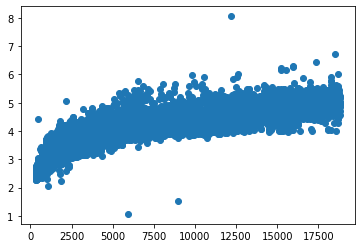

In [17]:
plt.scatter(diamonds.price, diamonds.z)
#If we plot z and price we see clear outliers in the data, I'll erase them

In [18]:
diamonds = diamonds[(diamonds["z"]<7) & (diamonds["z"]>2)]

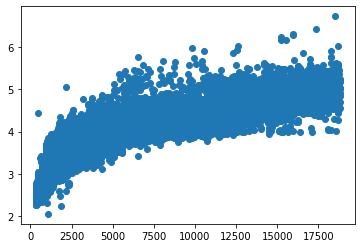

In [19]:
plt.scatter(diamonds.price, diamonds.z)
#looks way better now

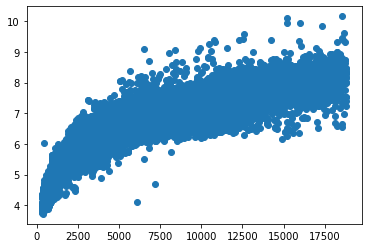

In [20]:
plt.scatter(diamonds.price, diamonds.y)

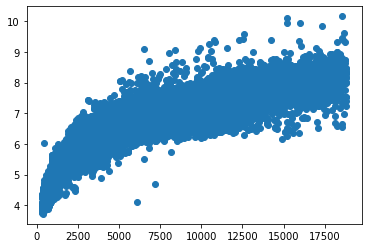

In [21]:
plt.scatter(diamonds.price, diamonds.y)

In [22]:
diamonds.loc[(diamonds['y'] < 5) & (diamonds['price']>5000)]

,cut,color,clarity,depth,carat,table,x,y,z,price
5628,Fair,H,VS2,65.6,1.51,56.0,7.08,4.70,4.0,7188
16873,Premium,H,VS1,61.6,1.12,58.0,6.64,4.11,3.7,6115


In [23]:
diamonds = diamonds.drop(labels=[5628,16873], axis=0)

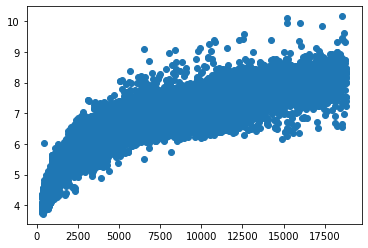

In [24]:
plt.scatter(diamonds.price, diamonds.y)

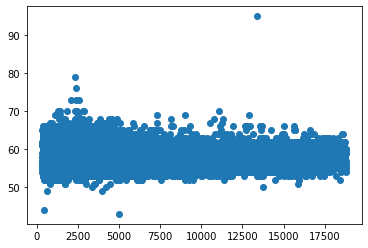

In [25]:
plt.scatter(diamonds.price, diamonds.table)
#imma clean the depth/table outliers too

In [26]:
diamonds = diamonds[(diamonds["table"]<73) & (diamonds["table"]>50)]

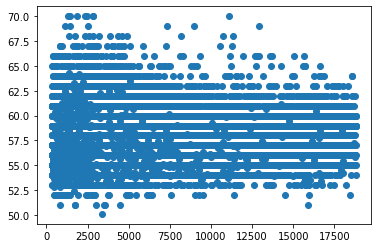

In [27]:
plt.scatter(diamonds.price, diamonds.table)

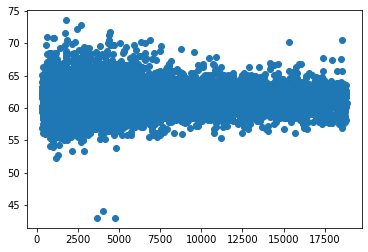

In [28]:
#nice, lets see the depth table
plt.scatter(diamonds.price, diamonds.depth)

In [29]:
#we keep having outliers so I'll delete
diamonds = diamonds[(diamonds["depth"]>50)]

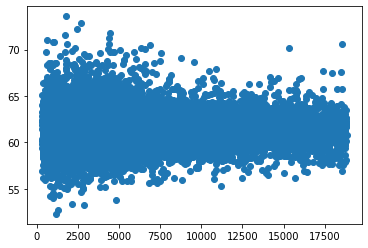

In [30]:
plt.scatter(diamonds.price, diamonds.depth)

In [31]:
diamonds.describe()

,depth,carat,table,x,y,z,price
count,40419.000000,40419.000000,40419.000000,40419.000000,40419.000000,40419.000000,40419.000000
mean,61.753754,0.797288,57.444229,5.729307,5.731475,3.538428,3925.856404
std,1.418938,0.475205,2.213374,1.122302,1.114022,0.693130,3989.966136
min,52.300000,0.200000,50.100000,3.770000,3.720000,2.060000,326.000000
25%,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000,945.000000
50%,61.800000,0.700000,57.000000,5.690000,5.710000,3.520000,2396.000000
75%,62.500000,1.040000,59.000000,6.540000,6.540000,4.035000,5327.500000
max,73.600000,4.500000,70.000000,10.230000,10.160000,6.720000,18823.000000


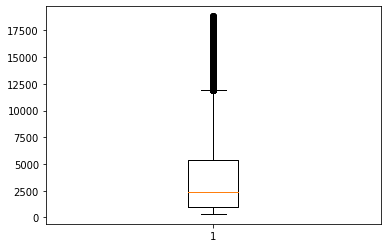

In [32]:
plt.boxplot(diamonds.price)
plt.show()

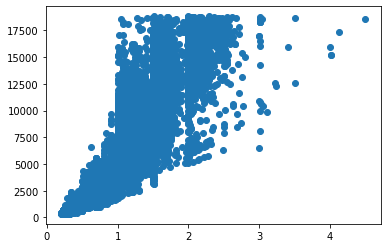

In [33]:
plt.scatter(diamonds.carat, diamonds.price)

In [34]:
#Should I erase carat bigger than 4?????? we'll see
diamonds = diamonds[(diamonds["carat"]<3.5)]

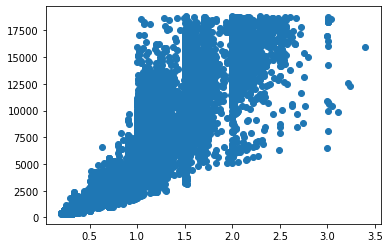

In [35]:
plt.scatter(diamonds.carat, diamonds.price)

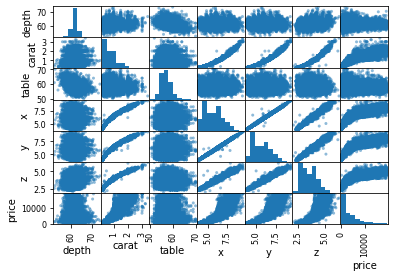

In [36]:
pd.plotting.scatter_matrix(diamonds)
plt.show()

In [37]:
diamonds.corr()

,depth,carat,table,x,y,z,price
depth,1.000000,0.026540,-0.301134,-0.026136,-0.029228,0.095748,-0.015231
carat,0.026540,1.000000,0.184118,0.978532,0.977737,0.977523,0.922634
table,-0.301134,0.184118,1.000000,0.198202,0.192192,0.157882,0.130556
x,-0.026136,0.978532,0.198202,1.000000,0.998790,0.991660,0.887654
y,-0.029228,0.977737,0.192192,0.998790,1.000000,0.991387,0.889355
z,0.095748,0.977523,0.157882,0.991660,0.991387,1.000000,0.882535
price,-0.015231,0.922634,0.130556,0.887654,0.889355,0.882535,1.000000


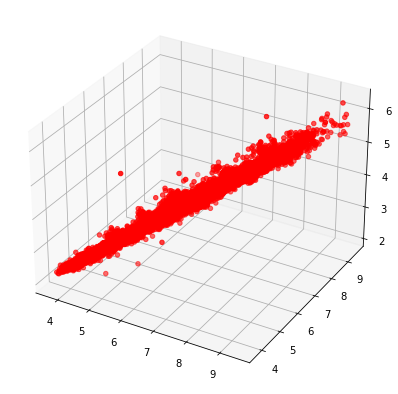

In [38]:
fig = plt.figure(figsize = (10 ,7))
ax = plt.axes(projection="3d")
ax.scatter3D(diamonds.y, diamonds.x, diamonds.z, color="red")
plt.show()

In [39]:
outliers = diamonds[(diamonds["price"]<18000)]
outliers.describe()

,depth,carat,table,x,y,z,price
count,40188.000000,40188.000000,40188.000000,40188.000000,40188.000000,40188.000000,40188.000000
mean,61.755228,0.789694,57.440646,5.715094,5.717289,3.529788,3843.149124
std,1.417488,0.464569,2.213648,1.108947,1.100602,0.685141,3848.714176
min,52.300000,0.200000,50.100000,3.770000,3.720000,2.060000,326.000000
25%,61.000000,0.400000,56.000000,4.710000,4.710000,2.900000,942.000000
50%,61.800000,0.700000,57.000000,5.690000,5.700000,3.520000,2375.500000
75%,62.500000,1.040000,59.000000,6.530000,6.530000,4.030000,5259.000000
max,73.600000,3.400000,70.000000,9.540000,9.420000,6.270000,17999.000000


In [40]:
diamonds.to_csv("./data/diamonds_clean.csv")